## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
df = pd.DataFrame(dataset)

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['State'])],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(dataset)

# 새로운 컬럼 이름 가져오기
col_names = ct.get_feature_names_out()

# DataFrame으로 변환
df_E = pd.DataFrame(X_encoded, columns=col_names)

# 확인
df_E.head(10)

,encoder__State_California,encoder__State_Florida,encoder__State_New York,remainder__R&D Spend,remainder__Administration,remainder__Marketing Spend,remainder__Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,0.0,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,1.0,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,0.0,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,0.0,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,1.0,0.0,0.0,123334.88,108679.17,304981.62,149759.96


In [7]:
df_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   encoder__State_California   50 non-null     float64
 1   encoder__State_Florida      50 non-null     float64
 2   encoder__State_New York     50 non-null     float64
 3   remainder__R&D Spend        50 non-null     float64
 4   remainder__Administration   50 non-null     float64
 5   remainder__Marketing Spend  50 non-null     float64
 6   remainder__Profit           50 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [8]:
df_E.describe()

,encoder__State_California,encoder__State_Florida,encoder__State_New York,remainder__R&D Spend,remainder__Administration,remainder__Marketing Spend,remainder__Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.340000,0.320000,0.340000,73721.615600,121344.639600,211025.097800,112012.639200
std,0.478518,0.471212,0.478518,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,0.000000,0.000000,0.000000,51283.140000,0.000000,14681.400000
25%,0.000000,0.000000,0.000000,39936.370000,103730.875000,129300.132500,90138.902500
50%,0.000000,0.000000,0.000000,73051.080000,122699.795000,212716.240000,107978.190000
75%,1.000000,1.000000,1.000000,101602.800000,144842.180000,299469.085000,139765.977500
max,1.000000,1.000000,1.000000,165349.200000,182645.560000,471784.100000,192261.830000


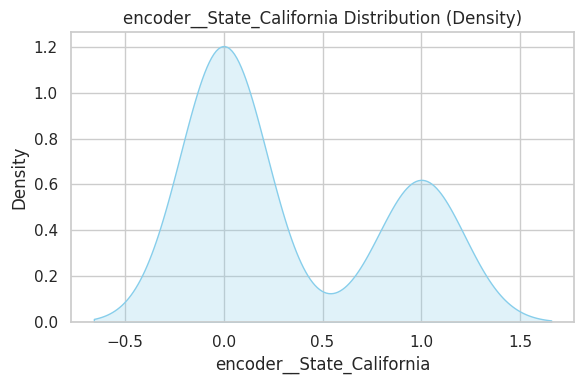

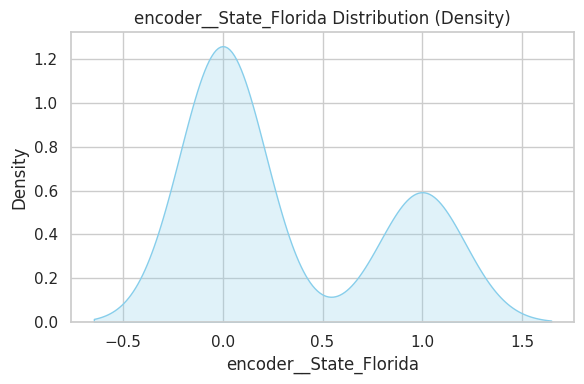

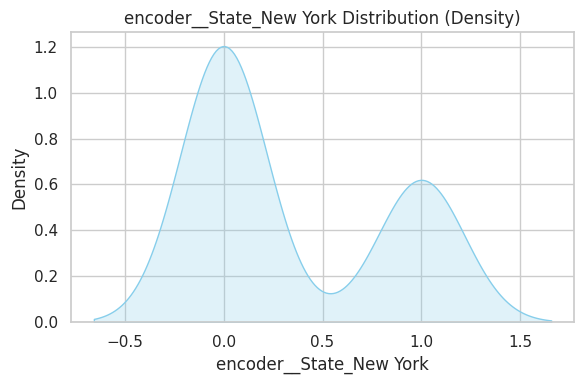

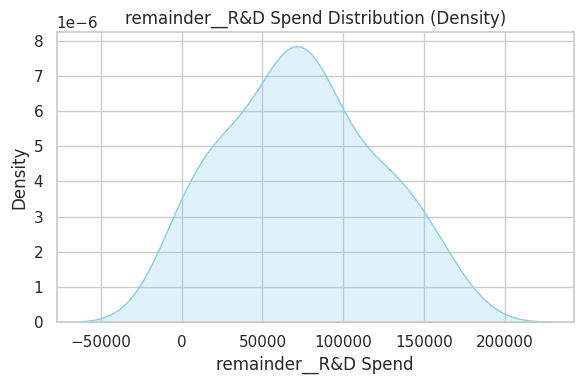

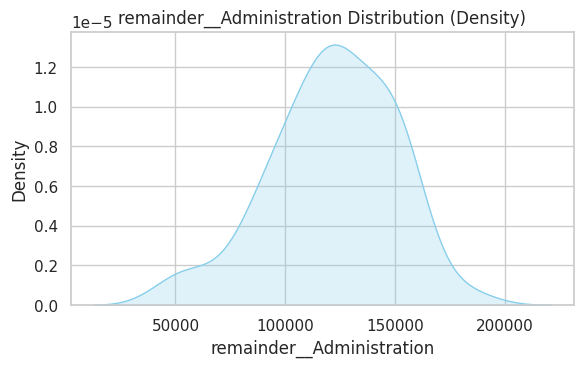

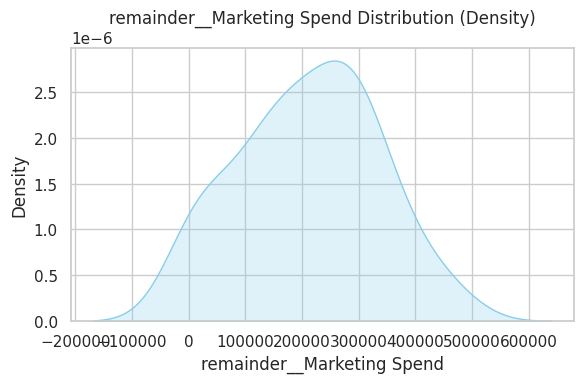

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df_E.select_dtypes(include='number').columns.drop('remainder__Profit')

sns.set(style='whitegrid')

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_E[col], fill=True, color='skyblue')
    plt.title(f'{col} Distribution (Density)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

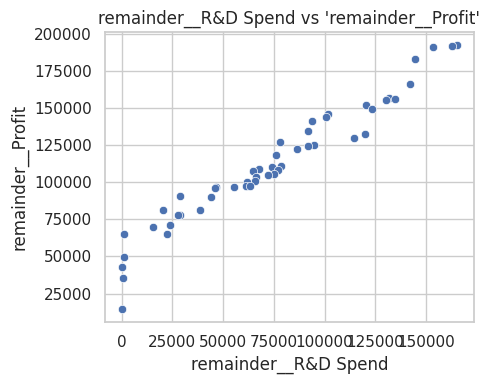

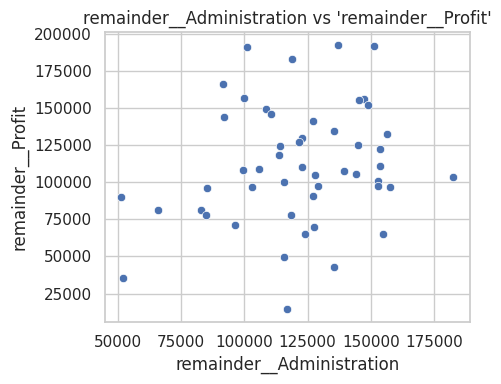

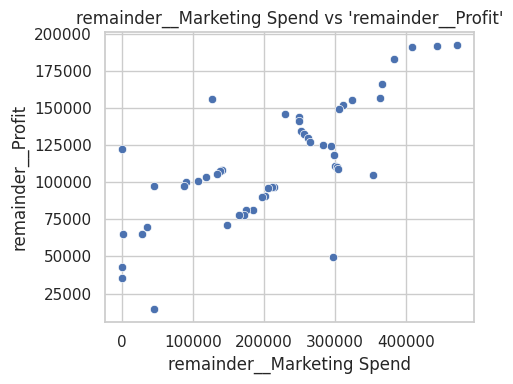

In [10]:
for col in num_cols[3:6]:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df_E[col], y=df_E['remainder__Profit'])
    plt.title(f"{col} vs 'remainder__Profit'")
    plt.xlabel(col)
    plt.ylabel('remainder__Profit')
    plt.tight_layout()
    plt.show()

In [11]:
from scipy import stats

profit_california = df_E[df_E['encoder__State_California'] == 1]['remainder__Profit']
profit_florida = df_E[df_E['encoder__State_Florida'] == 1]['remainder__Profit']
profit_newyork = df_E[df_E['encoder__State_New York'] == 1]['remainder__Profit']

f_stat, p_val = stats.f_oneway(profit_california, profit_florida, profit_newyork)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.6f}")

# if p_val < 0.05 Reject the null. There is statistical significance in average profit difference between three states (groups).
# if not, Fail to reject the null. There is no statistical significance in average profit difference between three states (groups).

F-statistic: 0.5748
p-value: 0.566729
